<a href="https://colab.research.google.com/github/AykeeSalazar/CpE-AIML/blob/main/COESA_Lab_03_Linear_Regression_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class LinearRegression_Simple():
  model_ = 0
  
  
  def covariance(self,vectA,vectB): #covariance
    return np.cov(vectA,vectB)[0,1] 


  def pearsons_r(self,vectA, vectB):
    return np.corrcoef(vectA, vectB)[1,0]
  

  def train(self,X, y):
    rho =  self.pearsons_r(X,y)
    w1 = rho * (np.std(y)/np.std(X))
    w0 = y.mean() - w1*X.mean()
    weights = w1,w0
    self.model_= np.array(weights)
    return self.model_



  def predict(self,x):
    w1 ,w0 = self.train(X,y)
    w1 = np.identity(x.size)*w1
    pred = w0 + np.dot(w1,x.reshape(x.size,1))
    return np.array(pred)
  

  def adj_r2(self,r2,n,k):
    return 1-((1-r2)*(n-1)/(n-k-1))
 
 
  def evaluate(self):
  
    y_hat = self.predict(X)
    y_reshape = y.reshape(-1,1)

    SST = np.sum(np.square(y_reshape - y_reshape.mean()))
    SSR = np.sum(np.square(y_hat - y_reshape.mean()))
    SSE = np.sum(np.square(y_hat - y_reshape))
    MSE = np.mean(np.square(y_hat - y_reshape))
    RMSE =  np.sqrt(MSE)
    RS = 1-(SSE/SST)
    ARS =  self.adj_r2(RS,y.size,1)
    evaluate_dict = {
     'Sum of Squares Total':[SST],
     'Sum of Squares Regression': [SSR],
     'Sum of Squares Error': [SSE],
     'Mean of Squared Error': [MSE],
     'Root Mean Squared Error': [RMSE],
     'R-squared': [RS],
     'Adjusted R-squared': [ARS]
     }
    return evaluate_dict


  def visualize(self):
    plt.scatter(X,y)
    plt.plot(X, self.predict(X[:y.size]), color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.savefig("visualize.jpg", dpi=400)
    plt.show

  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [ ]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

-456.6633012116484

Expected output value:
$$cov_{x,y} = -456.66$$

In [ ]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

-0.9050803915258335

Expected output value:
$$r = -0.90$$

In [ ]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([-0.54257026, -9.3787971 ])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [ ]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

array([[-63.63582299],
       [-64.17839325],
       [-64.72096351],
       [-65.26353377],
       [-65.80610403]])

Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': [0.8173253162992968],
 'Mean of Squared Error': [54.14797548090916],
 'R-squared': [0.8191705151245564],
 'Root Mean Squared Error': [7.358530796355286],
 'Sum of Squares Error': [5414.797548090916],
 'Sum of Squares Regression': [24529.42062971709],
 'Sum of Squares Total': [29944.21817780801]}

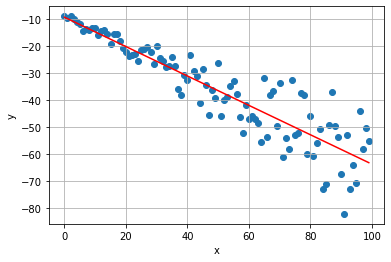

In [ ]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()